In [82]:
# 1. Using news article titles, provide a list of all the countries that are mentioned in the
# month of March 2017. Briefly comment on your findings.
# The output here is interesting, it does find the Countries, however it also finds anomilous data like ACCIDENTALLY, or A Mistake, 
# Unfortunately there is limited granularity in spacy so I would have to run this against another dictionary to extract only the countries. 

!pip3 install spacytextblob

import pandas as pd
from datetime import datetime # for grabbing date ranges
import spacy # for natural language processing
from spacytextblob.spacytextblob import SpacyTextBlob # for sentiment analysis
from collections import Counter
import seaborn as sns
import nltk 
nltk.download('punkt') 



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
def clean_dates(df):
  """
  Translates dates from various string formats to python Datetime objects. 
  Adds columns Date: Datetime, month: int, year: int, day: int.
  Also tosses out corrupted rows in the dataframe.

  :param df: (DataFrame) With column 'date'

  :returns: (DataFrame) Cleaned with additional columns Date, month, day, year
  """
  formats = {1: '%d-%b-%y', 0: '%B %d, %Y', 2: '%b %d, %Y'}
  dates = []
  bad = []
  for i, date in enumerate(df['date']):
    try:
      if date[0].isdigit():
        f = formats[1]
      elif len(date.split()[0].strip()) > 3:
        f = formats[0]
      else:
        f = formats[2]
      dates.append(datetime.strptime(date.strip(), f))
    except:
      bad.append([date, format, i])
  print(bad)
  df = df.drop([b[-1] for b in bad])
  df['Date'] = dates
  df['month'] = pd.DatetimeIndex(dates).month
  df['year'] = pd.DatetimeIndex(dates).year
  df['day'] = pd.DatetimeIndex(dates).day
  return df

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

In [3]:
fake = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fake.csv')
real = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/True.csv')

fake = clean_dates(fake)
real = clean_dates(real)
fDate = fake[(fake.year == 2017) & (fake.month == 3)]
rDate = real[(real.year == 2017) & (real.month == 3)]


countries = set()
fDoc = fDate.title.apply(nlp)
rDoc = rDate.title.apply(nlp)
for i in range(len(fDoc)): 
 for t in fDoc.iloc[i].ents:  # - Filtering the elements 
  if t.label_ == "GPE":
    countries.add(str(t))
for i in range(len(rDoc)):
 for t in rDoc.iloc[i].ents:
   if t.label_ == "GPE":
     countries.add(str(t)) 
countries

[['https://100percentfedup.com/served-roy-moore-vietnamletter-veteran-sets-record-straight-honorable-decent-respectable-patriotic-commander-soldier/', <built-in function format>, 9358], ['https://100percentfedup.com/video-hillary-asked-about-trump-i-just-want-to-eat-some-pie/', <built-in function format>, 15507], ['https://100percentfedup.com/12-yr-old-black-conservative-whose-video-to-obama-went-viral-do-you-really-love-america-receives-death-threats-from-left/', <built-in function format>, 15508], ['https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg', <built-in function format>, 15839], ['https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg', <built-in function format>, 15840], ['https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg', <built-in function format>, 17432], ['https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg', <built-in function format>, 17433], ['MSNBC HOST Rudely Assumes Steel Worker Would Neve

{'A Mistake',
 'ACCIDENTALLY',
 'AFGHANISTAN',
 'ALABAMA',
 'America',
 'Ankara',
 'BRITAIN',
 'Baghdad',
 'Bahrain',
 'Barcelona',
 'Berkeley',
 'Brazil',
 'Breitbart',
 'Britain',
 'Bronx',
 'Brussels',
 'California',
 'Canada',
 'Cancun',
 'Chesapeake',
 'Chicago',
 'China',
 'Colorado',
 'Cut',
 'DC',
 'Egypt',
 'Florida',
 'Front',
 'GERMANY',
 'Germany',
 'Hamburg',
 'Hawaii',
 'Illinois',
 'Indiana',
 'Iowa',
 'Iran',
 'Iraq',
 'Israel',
 'Italy',
 'Japan',
 'Jerusalem',
 'Jordan',
 'Kansas',
 'Key States',
 'Lavrov',
 'London',
 'Los Angeles',
 'MEXICO',
 'Macau',
 'Maryland',
 'Massachusetts',
 'Mexico',
 'Montana',
 'Montenegro',
 'Moscow',
 'N.J.',
 'NEW JERSEY',
 'New Hampshire',
 'New U.S.',
 'New York',
 "New York's",
 'North Carolina',
 "North Carolina '",
 'North Korea',
 "North Korea's",
 'Obama',
 'Oklahoma',
 'PELOSI',
 'Palm Beach County Looks',
 'Paris',
 'Pennsylvania',
 'Philadelphia',
 'Puerto Rico',
 'Putin',
 'QB',
 'Russia',
 'San Jose',
 'Seoul',
 'Shackles'

In [46]:
# 2. Using the news article titles, calculate the top five people mentioned on election day
# November 8th, 2016? Briefly comment on your findings.

# The output here is interesting between the two scans possibly indicatint limitations of spacy:
# Both methods do find the top person mentioned,
# however: one finds anomilous data like a space ' ' and the word VOTE
#          and the other doesn't think Trump is a person
# Unfortunately there is limited granularity in spacy so I would have to run this against another dictionary to extract only the names mentioned. 
def top(doc):
  peps = [
   token.lemma_ for token in doc if 
            (not token.is_stop and
             not token.is_punct and 
             t.label_ == "PERSON")]
  top = Counter(peps)
  return top

In [74]:
fDay = fake[(fake.year == 2016) & (fake.month == 11) & (fake.day == 8)]
flist = []
fdoc = fDay.title.apply(nlp)
print(fdoc)
people = Counter()
for i in range(len(fdoc)): 
 for t in fdoc.iloc[i].ents:
  cap = t.text.upper()
  if t.label_ == "PERSON":
   print(t.text, t.label_)
   flist.append(cap.upper())
  if "TRUMP" in cap:
   flist.append(cap.upper())
  if "TRUMP," in cap:
   flist.append(cap.upper())
fPeople = Counter(flist)
print(fPeople.most_common(5))  
fCount = fDoc.apply(top).sum().most_common(5)
print(fCount)

print('\n')
# Real election most common
rDay = real[(real.year == 2016) & (real.month == 11) & (real.day == 8)]
rlist = []
doc = rDay.title.apply(nlp)
people = Counter()
for i in range(len(doc)): 
 for t in doc.iloc[i].ents:
  cap = t.text.upper()
  if t.label_ == "PERSON":
    print(t.text, t.label_)
    #print(up)
    rlist.append(cap.upper())
  if "TRUMP" in cap:
    rlist.append(t.text)
  if "TRUMP," in cap:
    rlist.append(t.text)
rPeople = Counter(rlist) 
print(rPeople.most_common(5))
rCount = rDoc.apply(top).sum().most_common(5)
print('\n')
print(rCount)

3879     ( , Stock, Market, Literally, SHUTS, DOWN, And...
3880     ( , On, Election, Day, ,, Trump, Calls, Runnin...
3881     ( , BREAKING, :, Active, Shooter, Reported, Ou...
3882     ( , The, Internet, Hilariously, Reacts, To, Pi...
3883     ( , Trump, Supporter, Pulls, Gun, On, Man, Bec...
3884     ( , Trump, Tries, To, MANIPULATE, Nevada, Vote...
3885     ( , WTF, :, There, ’s, A, ‘, Make, America, Gr...
3886     ( , Couple, Married, 37, Years, In, Disagreeme...
3887     ( , Trump, Gets, HILARIOUSLY, Mocked, For, Loo...
3888     ( , WATCH, :, Bill, Maher, HAMMERS, Trump, In,...
3889     ( , WATCH, :, Anderson, Cooper, HUMILIATES, Tr...
3890     ( , This, Is, How, Trump, Could, Win, In, A, L...
3891     ( , Jon, Stewart, Returned, To, CRUSH, Trump, ...
12466    (RUSH, LIMBAUGH, :, HERE, ’S, WHY, George, and...
12467    (CLUELESS, ?, NEVADA, POLL, WORKERS, BREAK, TH...
12468    (MORE, CLASS, FROM, THE, LEFT, :, Topless, Hil...
12469    (BILL, CLINTON, Spaces, Out, …, Chews, On, His.

[0.0, 0.0, -0.1]


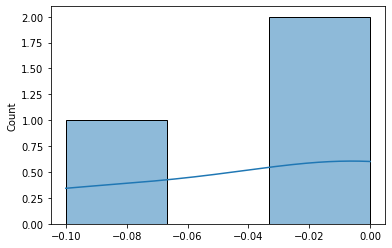

In [65]:
# 3. Create histograms of real and fake article sentiment mentioning the top person (from
# the previous analysis). Briefly comment on your findings.
# ᓚᘏᗢ

# Fake Election Polarity 
fLean = []
fDay = fake[(fake.year == 2016) & (fake.month == 11) & (fake.day == 8)]
fDoc = fDay.title.apply(nlp)
# fPerson = doc.apply(top).sum().most_common(1)    
for i in range(len(fDoc)):
 for t in fDoc.iloc[i].ents:
  caps = t.text.upper()
  if "TRUMP" in caps: 
   fLean.append(t._.blob.polarity)
#  fLean.append(t._.blob.polarity)
print(fLean)
sns.histplot(data = fLean, kde = True)

# I'm not sure if this graph represents the data properly,
# I've tried to follow the instructions given in class,
# but I'm not sure I understand the output 
# the graph seems to be understanding the data to some degree as it gets unique output for each run. 

Trump
Trump
Trump
Trump
Trump
Trump
   Polarity
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0


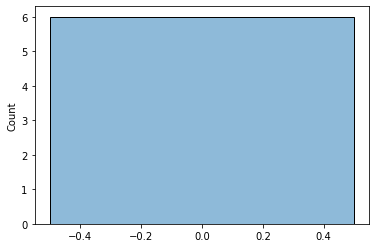

In [58]:
# Trump pulls 0 polarity?!
rLean = []
df_r3 = pd.DataFrame()
rDay = real[(real.year == 2016) & (real.month == 11) & (real.day == 8)]
rDoc = rDay.title.apply(nlp)
for i in range(len(rDoc)):
 for t in rDoc.iloc[i].ents:
#  if t.label_ == "PERSON":
   caps = t.text.upper()
   if 'TRUMP' in caps: 
      print(t.text)
      rLean.append(t._.blob.polarity)
      df_r3 = pd.DataFrame (rLean, columns = ['Polarity'])
print(df_r3)
sns.histplot(data = rLean, kde = True)

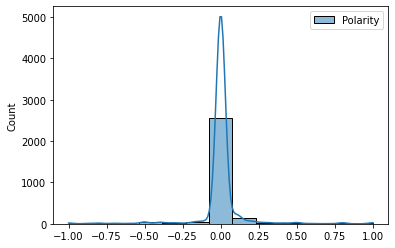

In [60]:
# 4. Plot histograms for real and fake news article sentiment (by title) for a 2 month period
# of your choosing. Briefly comment on your findings. 

# This section outputs odd results.
# WHY?! WHY DOES THIS WORK AND THE OTHERS DONT? !!! @.@ !!!
# While I would expect the neutral lean to be highest,
# There seem to be relatively low numbers of lean in the fake dataset
# on the months leading to election day? 
# ... while also looking the most correct as far as plotting

fDate = fake[(fake.year == 2016) & (fake.month > 9) & (fake.month < 12)]   
fDoc = fDate.title.apply(nlp)
fLean = []
for i in range(len(fDoc)): 
 for t in fDoc.iloc[i].ents:
  fLean.append(t._.blob.polarity)
  df_f4 = pd.DataFrame (fLean, columns = ['Polarity'])
sns.histplot(data = df_f4, kde = True)





[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.13636363636363635, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05000000000000002, 0.0, 0.0, 0.0, 0.0, 0.13636363636363635, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05000000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.2, 0.0, 0.0, 0.0, 0.0, 0

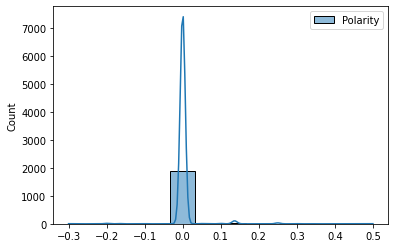

In [63]:
rLean = []
rDate = real[(real.year == 2016) & (real.month > 9) & (real.month < 12)]   
rDoc = rDate.title.apply(nlp)
df_r4 = pd.DataFrame ()
for i in range(len(rDoc)): 
 for t in rDoc.iloc[i].ents:
   rLean.append(t._.blob.polarity)
   df_r4 = pd.DataFrame (rLean, columns = ['Polarity'])
print(rLean)
sns.histplot(data = df_r4, kde = True) 

In [90]:
# 5. Perform 1 additional analysis of your choosing on some date range/date of your choosing.
# Justify your analysis choice, and comment on your findings.
# Trying to find trends in Subjectivity by mapping to a Dataframe and projecting that through various graphs.

fDate = fake[(fake.year == 2017) & (fake.month > 1) & (fake.month < 3)]   
fDoc = fDate.title.apply(nlp)
fLean = []
for i in range(len(fDoc)): 
 for t in fDoc.iloc[i].ents:
   fPol = t._.blob.subjectivity 
   fLean.append(fPol)
   df_f5 = pd.DataFrame (fLean, columns = ['Subjectiviy'])
df_f5

rDoc = rDate.title.apply(nlp)
rLean = []
for i in range(len(rDoc)): 
 for t in rDoc.iloc[i].ents:
   rPol = t._.blob.subjectivity
   rLean.append(fPol)
   df_r5 = pd.DataFrame (fLean, columns = ['Subjectivity'])
df_r5

,Subjectivity
0,0.000000
1,0.000000
2,0.000000
3,0.333333
4,1.000000
...,...
1304,0.000000
1305,0.000000
1306,0.000000
1307,0.250000


CPU times: user 17.4 s, sys: 195 ms, total: 17.6 s
Wall time: 17.6 s
0


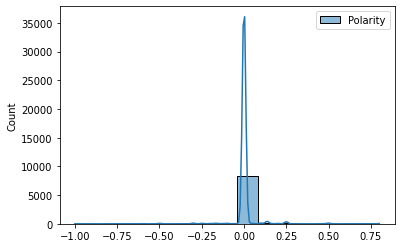

In [79]:
# 6. Time running a Spacy language model on 5 full text news articles. Use back of the
# napkin math to calculate how long it would take to run the language model on the full
# text of one week of articles. Briefly comment on your findings.
flean = []
fDate = fake[(fake.year == 2017) & (fake.month == 1) & (fake.day > 0) & (fake.day < 8)]
%time fDoc = fDate.text.apply(nlp)
# CPU times: user 1.48 s, sys: 18.3 ms, total: 1.49 s
# Wall time: 1.5 s
c = 0
for i in range(len(fDoc)): 

  for t in fDoc.iloc[i].ents:
 #  while c < 5:
    fLean.append(t._.blob.polarity)
    df = pd.DataFrame (fLean, columns = ['Polarity'])
#    c = c + 1
#  print(fLean)
sns.histplot(data = df, kde = True)     
print(c)

3879     ( , Stock, Market, Literally, SHUTS, DOWN, And...
3880     ( , On, Election, Day, ,, Trump, Calls, Runnin...
3881     ( , BREAKING, :, Active, Shooter, Reported, Ou...
3882     ( , The, Internet, Hilariously, Reacts, To, Pi...
3883     ( , Trump, Supporter, Pulls, Gun, On, Man, Bec...
3884     ( , Trump, Tries, To, MANIPULATE, Nevada, Vote...
3885     ( , WTF, :, There, ’s, A, ‘, Make, America, Gr...
3886     ( , Couple, Married, 37, Years, In, Disagreeme...
3887     ( , Trump, Gets, HILARIOUSLY, Mocked, For, Loo...
3888     ( , WATCH, :, Bill, Maher, HAMMERS, Trump, In,...
3889     ( , WATCH, :, Anderson, Cooper, HUMILIATES, Tr...
3890     ( , This, Is, How, Trump, Could, Win, In, A, L...
3891     ( , Jon, Stewart, Returned, To, CRUSH, Trump, ...
12466    (RUSH, LIMBAUGH, :, HERE, ’S, WHY, George, and...
12467    (CLUELESS, ?, NEVADA, POLL, WORKERS, BREAK, TH...
12468    (MORE, CLASS, FROM, THE, LEFT, :, Topless, Hil...
12469    (BILL, CLINTON, Spaces, Out, …, Chews, On, His.

AttributeError: ignored

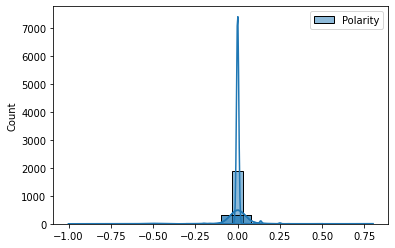

In [80]:
# 7. Perform analyses 2-5 on the full text of a single week’s real and fake news articles. Are
# there any differences between the two corpora discernable from these analyses? Discuss
# any limitations of these analyses to uncover differences between the two corpora. Suggest
# additional analyses that might uncover meaningful differences, between the two corpora
# and salient qualities of each corpora.

fDay = fake[(fake.year == 2016) & (fake.month == 11) & (fake.day > 0) & (fake.day < 8)]
rDay = real[(real.year == 2016) & (real.month == 11) & (real.day > 0) & (real.day < 8)]

flist = []
fdoc = fDay.title.apply(nlp)
print(fdoc)
people = Counter()
for i in range(len(fdoc)): 
 for t in fdoc.iloc[i].ents:
  cap = t.text.upper()
  if t.label_ == "PERSON":
   print(t.text, t.label_)
   flist.append(cap.upper())
  if "TRUMP" in cap:
   flist.append(cap.upper())
  if "TRUMP," in cap:
   flist.append(cap.upper())
fPeople = Counter(flist)
print(fPeople.most_common(5))  
fCount = fDoc.apply(top).sum().most_common(5)
print(fCount)

print('\n')
rlist = []
doc = rDay.title.apply(nlp)
people = Counter()
for i in range(len(doc)): 
 for t in doc.iloc[i].ents:
  cap = t.text.upper()
  if t.label_ == "PERSON":
    print(t.text, t.label_)
    rlist.append(cap.upper())
  if "TRUMP" in cap:
    rlist.append(t.text)
  if "TRUMP," in cap:
    rlist.append(t.text)
rPeople = Counter(rlist) 
print(rPeople.most_common(5))
rCount = rDoc.apply(top).sum().most_common(5)
print('\n')
print(rCount)

fLean = []
fDoc = fDay.title.apply(nlp)
for i in range(len(fDoc)):
 for t in fDoc.iloc[i].ents:
  caps = t.text.upper()
  if "TRUMP" in caps: 
   fLean.append(t._.blob.polarity)
print(fLean)
sns.histplot(data = fLean, kde = True)

rLean = []
df_r3 = pd.DataFrame()
rDoc = rDay.title.apply(nlp)
for i in range(len(rDoc)):
 for t in rDoc.iloc[i].ents:
   caps = t.text.upper()
   if 'TRUMP' in caps: 
      print(t.text)
      rLean.append(t._.blob.polarity)
      df_r3 = pd.DataFrame (rLean, columns = ['Polarity'])
print(df_r3)


fDoc = fDate.title.apply(nlp)
fLean = []
for i in range(len(fDoc)): 
 for t in fDoc.iloc[i].ents:
  fLean.append(t._.blob.polarity)
  df_f4 = pd.DataFrame (fLean, columns = ['Polarity'])
sns.histplot(data = df_f4, kde = True)

rLean = []
rDoc = rDate.title.apply(nlp)
df_r4 = pd.DataFrame ()
for i in range(len(rDoc)): 
 for t in rDoc.iloc[i].ents:
   rLean.append(t._.blob.polarity)
   df_r4 = pd.DataFrame (rLean, columns = ['Polarity'])
print(rLean)
sns.histplot(data = df_r4, kde = True) 


fDoc = fDate.title.apply(nlp)
fLean = []
for i in range(len(fDoc)): 
 for t in fDoc.iloc[i].ents:
   fPol = t._.blob.subjectivity
   fLean.append(fPol)
   df_f5 = pd.DataFrame (fLean, columns = ['Subjectivity'])
print(fLean)

rDoc = rDate.title.apply(nlp)
rLean = []
for i in range(len(rDoc)): 
 for t in rDoc.iloc[i].ents:
   rPol = t._.blob.subjectivity
   rLean.append(fPol)
   df_r5 = pd.DataFrame (fLean, columns = ['Subjectivity'])
print(rLean)

